# Basic Storytelling on BackOrder dataset
****
**Goal :** To find relations between features and find trends if any


In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

Now we alreday have clean data let's start with the loading and understanding the data
<br>

In [2]:
df = pd.read_csv('../Backorder_clean.csv')
df.head()

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommended_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,No,0.99,0.99,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,1.0,No,0.10,0.13,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,4.0,2.0,No,0.84,0.83,Yes,No,No,Yes,No,No


In [3]:
df.shape

(1639734, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639734 entries, 0 to 1639733
Data columns (total 17 columns):
product_id                      1639734 non-null int64
current_inventory               1639734 non-null float64
transit_duration                1639734 non-null float64
prior_sales_1_month             1639734 non-null float64
prior_sales_3_month             1639734 non-null float64
prior_sales_6_month             1639734 non-null float64
prior_sales_9_month             1639734 non-null float64
minimum_recommended_stock       1639734 non-null float64
source_has_issue                1639734 non-null object
source_performance_6_months     1639734 non-null float64
source_performance_12_months    1639734 non-null float64
deck_risk                       1639734 non-null object
oe_constraint                   1639734 non-null object
ppap_risk                       1639734 non-null object
stop_auto_buy                   1639734 non-null object
rev_stop                        1639734

Lets set the type as category for the categorical columns for ease in some plotting

In [5]:
for col in ['source_has_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
    df[col] = df[col].astype('category')

The columns for the prior sales could be corerelated, we will analyze them.

In [6]:
sales_corr_df = df[['prior_sales_1_month','prior_sales_3_month','prior_sales_6_month','prior_sales_9_month']]
sales_corr = sales_corr_df.corr()
sales_corr

,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month
prior_sales_1_month,1.000000,0.908458,0.870974,0.832273
prior_sales_3_month,0.908458,1.000000,0.988823,0.955235
prior_sales_6_month,0.870974,0.988823,1.000000,0.973371
prior_sales_9_month,0.832273,0.955235,0.973371,1.000000


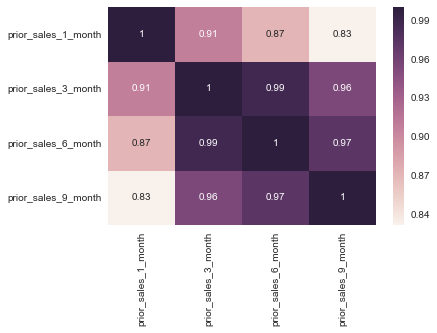

In [7]:
_ = sns.heatmap(sales_corr, annot=True)

We can see that, as expected, these prior sales over the periods of 3, 6 and 9 months are highly correlated.

In [8]:
sourceperf_corr_df = df[['source_performance_6_months','source_performance_12_months']]
sourceperf_corr = sourceperf_corr_df.corr()
sourceperf_corr

,source_performance_6_months,source_performance_12_months
source_performance_6_months,1.000000,0.944819
source_performance_12_months,0.944819,1.000000


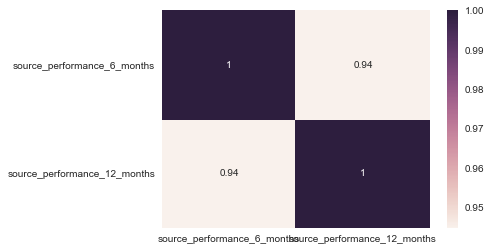

In [9]:
_ = sns.heatmap(sourceperf_corr, annot=True)

Similarly, the performace over 6 and 12 month periods are highly correlated too.

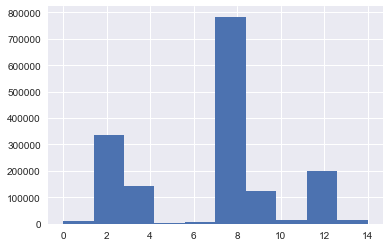

In [10]:
_ = plt.hist(df.transit_duration)

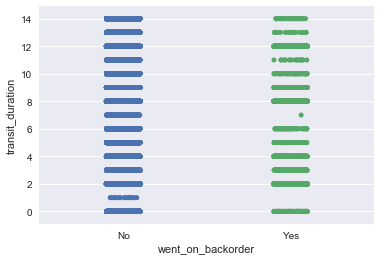

In [11]:
sns.stripplot(x='went_on_backorder', y='transit_duration', data=df, jitter=True);

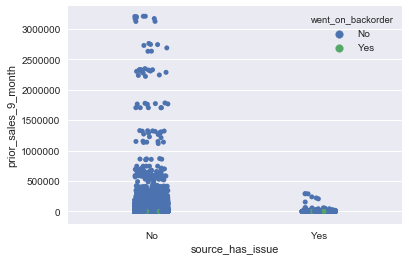

In [12]:
sns.stripplot(x='source_has_issue', y='prior_sales_9_month', hue='went_on_backorder', jitter=True, data=df)

This shows that the sales in the last 9 months are directly impacted by issues at the source

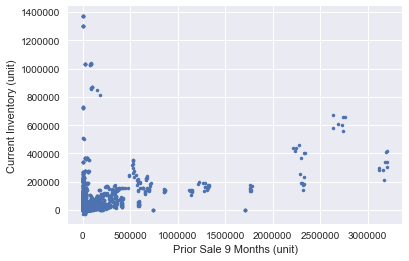

In [19]:
plt.plot(df.prior_sales_9_month, df.current_inventory, marker='.', linestyle='None')
plt.xlabel('Prior Sale 9 Months (unit)')
plt.ylabel('Current Inventory (unit)')

It would be interesting to find out why the current inventory for some products is as high as 1.4 Million 
even when there is no sale in prior 9 months. This could even be a question to client. It could be a bad data as well.

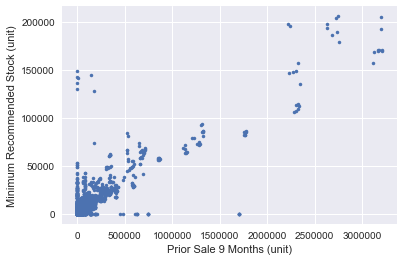

In [18]:
plt.plot(df.prior_sales_9_month, df.minimum_recommended_stock, marker='.', linestyle='None')
plt.xlabel('Prior Sale 9 Months (unit)')
plt.ylabel('Minimum Recommended Stock (unit)')

Another observation around the recommended stock where we can see that prior sales were zero, however, the minimum recommended stock is kept at a high value of 125k+. It could be a bad data or potential outliers.